### Challenge 1
Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
datafile = '/Users/adamsantos/ds/metis/metisgh/nyc18_ds17/challenges/challenges_data/house-votes-84.data'

df = pd.read_csv(datafile,sep=',', header=None)

In [206]:
df = df.replace('n',0)
df = df.replace('y',1)

In [207]:
df = df.replace('?',df.mean(axis='columns'))

In [208]:
df=df.fillna(df.mean())
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.000000,1.0,0.000000,1.000000,republican.
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.0,0.000000,0.812689,republican.
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,1.0,0.000000,0.000000,democrat.
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.0,0.000000,1.000000,democrat.
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.000000,1.0,1.000000,1.000000,democrat.
5,0.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,democrat.
6,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.509756,1.0,1.000000,1.000000,democrat.
7,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,1.0,0.427518,1.000000,republican
8,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.0,0.000000,1.000000,republican
9,1.00000,1.0,1.0,0.000000,0.000000,0.0,1.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.427518,0.812689,democrat


### Challenge 2
Split the data into a test and training set. Use this function:

In [209]:
from sklearn.cross_validation import train_test_split

X = df.drop(16, axis=1)
y = df[16]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### Challenge 3
Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?

In [210]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = list(range(1, 21))
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append((k,accuracy_score(y_test, y_pred)))
print(max(scores,key=lambda item:item[1]))


(3, 0.9310344827586207)


### Challenge 4
Make a similar model but with `LogisticRegression` instead, calculate test accuracy.

In [211]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.9540229885057471


### Challenge 5
Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [212]:
df[16] = df[16].map(lambda x: x.rstrip('.'))



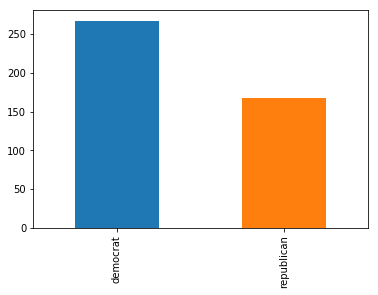

In [213]:

df[16].value_counts().plot.bar()

In [214]:
def all_one(n,label):
    return np.array([label] * n)

In [215]:
y_preds_dem = all_one(len(y_test),'democrat')

In [216]:
print(accuracy_score(y_test, y_preds_dem))

0.6436781609195402


In [217]:
y_preds_rep = all_one(len(y_test),'republican')

In [218]:
print(accuracy_score(y_test, y_preds_rep))

0.3448275862068966


### Challenge 6
Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

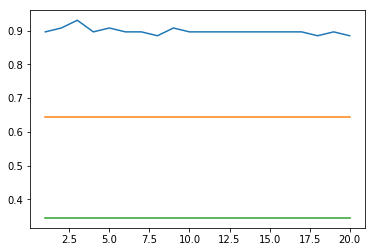

In [219]:
plt.plot(*zip(*scores))
plt.plot(k_range,[accuracy_score(y_test, y_preds_dem)]*20)
plt.plot(k_range,[accuracy_score(y_test, y_preds_rep)]*20)

### Challenge 7
Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve
```

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )
Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

In [220]:
from sklearn.learning_curve import learning_curve

m, train_err, test_err = learning_curve(lr,X,y)
train_err
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err,axis=1)
m

array([ 29,  94, 159, 224, 290])

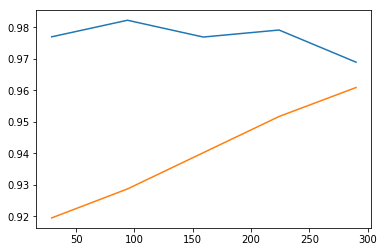

In [221]:
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)

In [222]:
knn = KNeighborsClassifier(n_neighbors=3)

m_knn, train_err_knn, test_err_knn = learning_curve(knn,X,y)

train_cv_err_knn = np.mean(train_err_knn, axis=1)
test_cv_err_knn = np.mean(test_err_knn,axis=1)

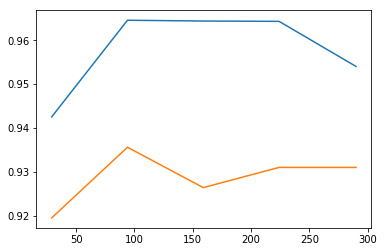

In [223]:
plt.plot(m_knn,train_cv_err_knn)
plt.plot(m_knn,test_cv_err_knn)

### Challenge 8
This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

In [224]:
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [225]:
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
rf = RandomForestClassifier()

In [226]:
gnb.fit(X_train,y_train)
svc.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [227]:
y_gnb=gnb.predict(X_test)
y_svc=svc.predict(X_test)
y_dtc=dtc.predict(X_test)
y_rf=rf.predict(X_test)

In [228]:
print("Gauss NB Accuracy: " + str(accuracy_score(y_test, y_gnb)))
print("Support Vector Machine Accuracy: " + str(accuracy_score(y_test, y_svc)))
print("Decision Tree Accuracy: " + str(accuracy_score(y_test, y_dtc)))
print("Random Forest Accuracy: " + str(accuracy_score(y_test, y_rf)))

Gauss NB Accuracy: 0.8505747126436781
Support Vector Machine Accuracy: 0.9540229885057471
Decision Tree Accuracy: 0.9310344827586207
Random Forest Accuracy: 0.9195402298850575


### Challenge 9
There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [229]:
from sklearn.cross_validation import cross_val_score

In [230]:
print("Cross Val Score Naive Bayes: "+str(np.mean(cross_val_score(gnb,X,y))))
print("Cross Val Score SVC: "+str(np.mean(cross_val_score(svc,X,y))))
print("Cross Val Score Decision Tree: "+str(np.mean(cross_val_score(dtc,X,y))))
print("Cross Val Score Random Forest: "+str(np.mean(cross_val_score(rf,X,y))))

Cross Val Score Naive Bayes: 0.9310344827586207
Cross Val Score SVC: 0.9540229885057472
Cross Val Score Decision Tree: 0.9517241379310345
Cross Val Score Random Forest: 0.9540229885057472


### Challenge 10
Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [293]:
datafile = '/Users/adamsantos/ds/metis/metisgh/nyc18_ds17/challenges/challenges_data/house-votes-84.data'

df2 = pd.read_csv(datafile,sep=',', header=None)

In [294]:
df2 = df2.replace('n',0)
df2 = df2.replace('y',1)
df2 = df2.replace('?',df.mode())


In [295]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,republican.
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,republican.
2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,democrat.
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,democrat.
4,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,democrat.


In [296]:
df2=df2.drop(16,axis=1)

In [297]:
X2 = df2.drop(15,axis=1)
y2 = df2[15]

In [298]:
lr2 = LogisticRegression()

In [299]:
print("Cross Val Score Predict Vote 15: "+str(np.mean(cross_val_score(lr2,X2,y2))))

Cross Val Score Predict Vote 15: 0.8482235955842475


### Challenge 11
Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [310]:
datafile = '/Users/adamsantos/ds/metis/metisgh/nyc18_ds17/challenges/challenges_data/2013_movies.csv'

df_movies = pd.read_csv(datafile,sep=',')

In [311]:
df_movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


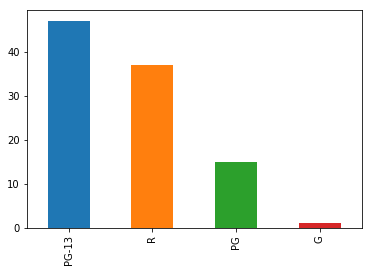

In [312]:
df_movies['Rating'].value_counts().plot.bar()

In [321]:
# dums2 = pd.get_dummies(df_movies['Director'])

# df_movies = df_movies.merge(dums2, how='outer', left_index=True, right_index=True)

# df_movies.info()

In [322]:
# df_movies=df_movies.dropna(axis='rows')
# df_movies.info()

In [315]:
X_movies = df_movies.drop(["Rating",'ReleaseDate','Title','Director'],axis=1)
y_movies = df_movies['Rating']

X_train, X_test, y_train, y_test = train_test_split(X_movies, y_movies, test_size=0.2,random_state=42)

In [316]:
k_range = list(range(1, 21))
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append((k,accuracy_score(y_test, y_pred)))
print(max(scores,key=lambda item:item[1]))

(10, 0.7777777777777778)


In [319]:
knn = KNeighborsClassifier(n_neighbors=10)
lr_movies = LogisticRegression()

knn.fit(X_train,y_train)
lr_movies.fit(X_train,y_train)
y_knns=knn.predict(X_test)
y_lrs=lr_movies.predict(X_test)

In [320]:
print("KNN Accuracy: " + str(accuracy_score(y_test, y_knns)))
print("Logistic Regression Accuracy: " + str(accuracy_score(y_test, y_lrs)))

KNN Accuracy: 0.7777777777777778
Logistic Regression Accuracy: 0.5555555555555556


In [323]:
y_preds_pg13 = all_one(len(y_test),'PG-13')
print("Only Predict PG-13 Accuracy: " + str(accuracy_score(y_test, y_preds_pg13)))

Only Predict PG-13 Accuracy: 0.5


In [327]:
X_train.head()

,Budget,DomesticTotalGross,Runtime,Adam McKay,Alan Taylor,Alfonso Cuaron,Andres Muschietti,Andrew Niccol,Antoine Fuqua,Baltasar Kormakur,...,Spike Jonze,Stephen Frears,Steve McQueen (II),Steven Soderbergh,Thor Freudenthal,Todd Phillips,Tommy Wirkola,Tyler Perry,Woody Allen,Zack Snyder
58,130000000.0,60522097,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,30000000.0,35266619,92,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,135000000.0,187168425,98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,190000000.0,101802906,131,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,135000000.0,83028128,96,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
lr_movies.coef_

array([[-5.40258342e-09, -3.87273323e-09, -1.36719623e-13,
        -3.74386198e-17, -1.88667705e-17, -1.97672096e-17,
        -4.78488379e-17,  0.00000000e+00, -3.77430614e-17,
        -4.13560478e-17,  7.35069986e-17, -2.93275079e-17,
         7.72022292e-17, -5.04233426e-17,  0.00000000e+00,
        -2.71993706e-17,  7.06110926e-17, -3.16665581e-17,
         1.06306108e-16,  8.34337007e-17,  0.00000000e+00,
        -3.60753078e-17,  8.49779685e-17,  0.00000000e+00,
        -4.08749806e-17, -4.49273608e-17,  0.00000000e+00,
         0.00000000e+00, -4.22292890e-17, -4.95995527e-17,
         0.00000000e+00,  0.00000000e+00, -2.34113051e-17,
        -2.46674158e-17,  0.00000000e+00, -1.61586086e-17,
        -5.03136252e-17, -2.88695958e-17, -8.76626287e-17,
        -5.44354765e-17, -4.43813293e-17,  0.00000000e+00,
         7.24513165e-17, -4.38600239e-17,  0.00000000e+00,
        -3.83707021e-17,  0.00000000e+00,  0.00000000e+00,
        -5.35179722e-17, -4.69896296e-17, -4.57727517e-1

There are a long list of coefficients because of the dummy variables! The non director variables have a much greater effect on predicting the rating. However our model does not do that well!

### Challenge 12
Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

 * What is the average and standard deviation of the age of all of the patients?
 * What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
 * Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
 * What is the earliest year of surgery in this dataset?
 * What is the most recent year of surgery?
 * Use logistic regression to predict survival after 5 years. How well does your model do?
 * What are the coefficients of logistic regression? Which features affect the outcome how?
 * Draw the learning curve for logistic regression in this case.

In [335]:
datafile = '/Users/adamsantos/ds/metis/metisgh/nyc18_ds17/challenges/challenges_data/haberman.data'

df_cancer = pd.read_csv(datafile,sep=',', header=None)

In [336]:
df_cancer.columns=['Age','Year','Nodes','Survive?']

In [347]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age         306 non-null int64
Year        306 non-null int64
Nodes       306 non-null int64
Survive?    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [344]:
print("Mean Age: "+str(df_cancer['Age'].mean()))
print("Age ST Dev: "+str(df_cancer['Age'].std()))

Mean Age: 52.45751633986928
Age ST Dev: 10.80345234930328


In [345]:
df_survival = df_cancer.loc[df_cancer['Survive?']==1]

In [350]:
print("Mean Age Survive: "+str(df_survival['Age'].mean()))
print("Age ST Dev Survive: "+str(df_survival['Age'].std()))

Mean Age Survive: 52.01777777777778
Age ST Dev Survive: 11.012154179929546


In [351]:
df_nonsurvival = df_cancer.loc[df_cancer['Survive?']==2]

In [352]:
print("Mean Age Not Survive: "+str(df_nonsurvival['Age'].mean()))
print("Age ST Dev Not Survive: "+str(df_nonsurvival['Age'].std()))

Mean Age Not Survive: 53.67901234567901
Age ST Dev Not Survive: 10.16713720829741


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e50b3c8>]],
      dtype=object)

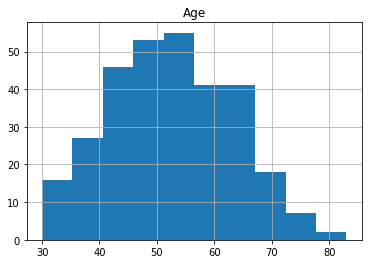

In [353]:
df_cancer.hist(column='Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e0be5f8>]],
      dtype=object)

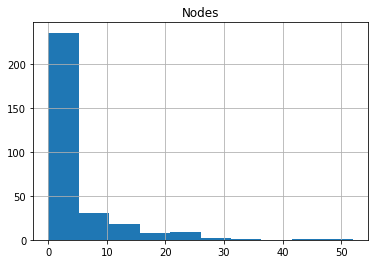

In [354]:
df_cancer.hist(column='Nodes')

In [356]:
print("The earliest year is 19"+str(df_cancer['Year'].min()))

The earliest year is 1958


In [357]:
print("The most recent surgery is 19"+str(df_cancer['Year'].max()))

The most recent surgery is 1969


In [358]:
lr_cancer = LogisticRegression()

In [367]:
X_cancer = df_cancer.drop('Survive?',axis=1)
y_cancer = df_cancer['Survive?']

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2,random_state=42)

In [361]:
lr_cancer.fit(X_train,y_train)
y_cancer = lr_cancer.predict(X_test)

In [362]:
print("Accuracy: " + str(accuracy_score(y_test, y_cancer)))

Accuracy: 0.6935483870967742


In [363]:
lr_cancer.coef_

array([[ 0.03260464, -0.05187597,  0.10270644]])

The number of nodes is the biggest factor in our prediction model

In [374]:
m, train_err, test_err = learning_curve(lr_cancer,X_cancer,y_cancer)

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(test_err,axis=1)
train_cv_err_cancer = np.mean(train_err_knn, axis=1)
test_cv_err_cancer = np.mean(test_err_knn,axis=1)

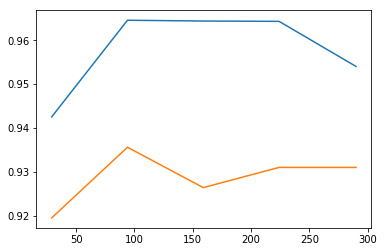

In [375]:
plt.plot(m_knn,train_cv_err_cancer)
plt.plot(m_knn,test_cv_err_cancer)